##   UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD
##   MODELO HIERARCHICAL
##   YEILER CORTES OSORIO
##   ANALISIS DE DATOS
##   TAREA 4
##   GRUPO 82

In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Cargar data
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## buscar valores faltantes

In [13]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## buscar valores atipicos

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

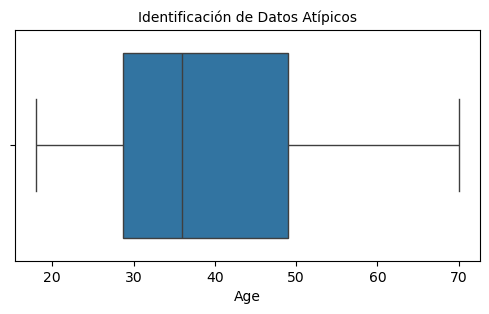

In [16]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

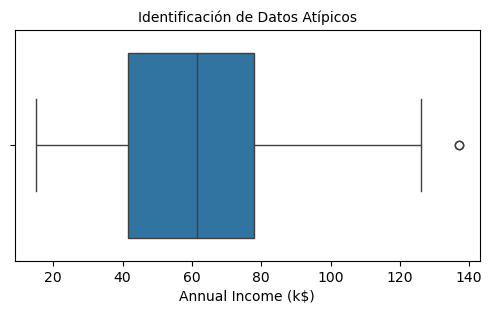

In [18]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

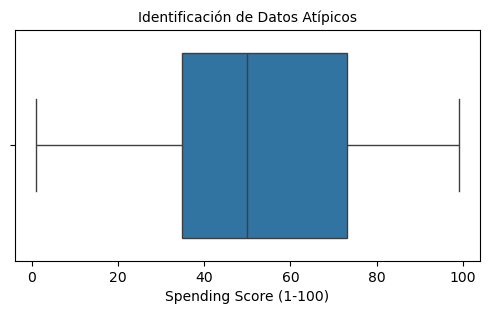

In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

## seleccion de caracteristicas

In [23]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [42]:
Datos1 = data[["Age","Annual Income (k$)"]]

In [43]:
Datos1.head(10)

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17
6,35,18
7,23,18
8,64,19
9,30,19


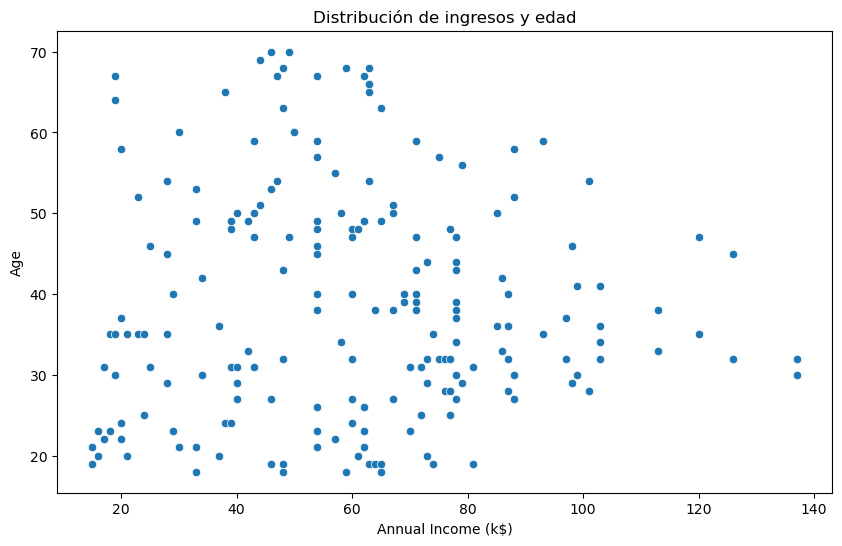

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Annual Income (k$)'], y=Datos1['Age'])
plt.title('Distribución de ingresos y edad')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

## Entrenar el modelo configurando los diferentes hiperparámetros

In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos1[['Age', 'Annual Income (k$)']])

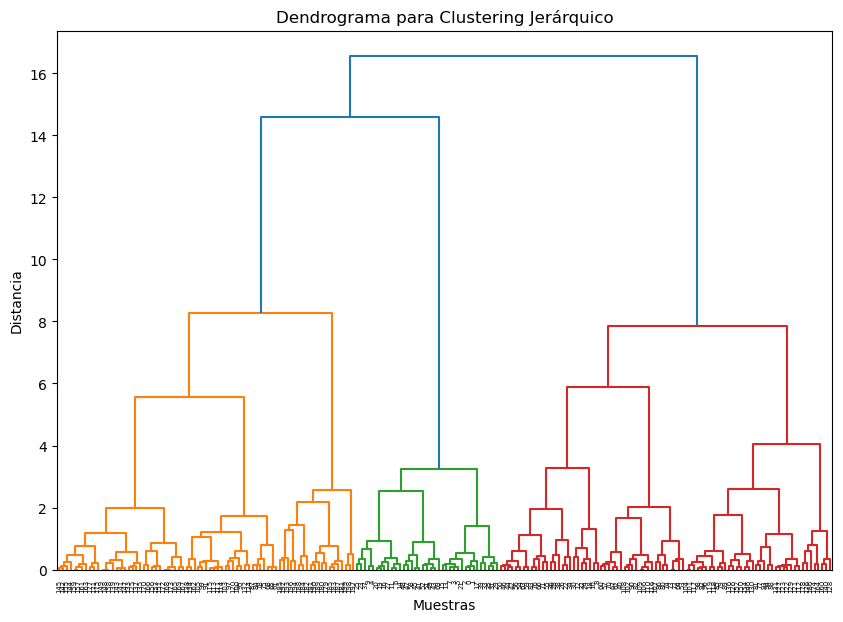

In [53]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

## gráficas que permitan visualizar los resultados del modelo

In [64]:
# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].fillna(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529
Índice de Davies-Bouldin: 1.1277290061047862


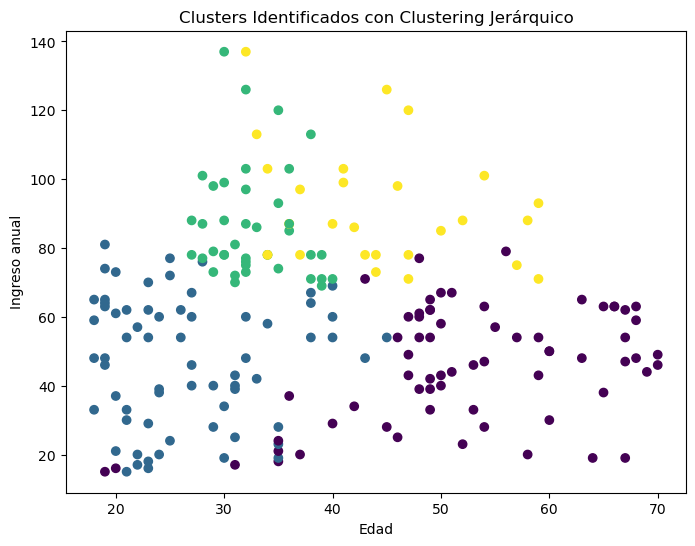

In [67]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
data['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso anual')
plt.show()

Silhouette Score: 0.3614512741691407


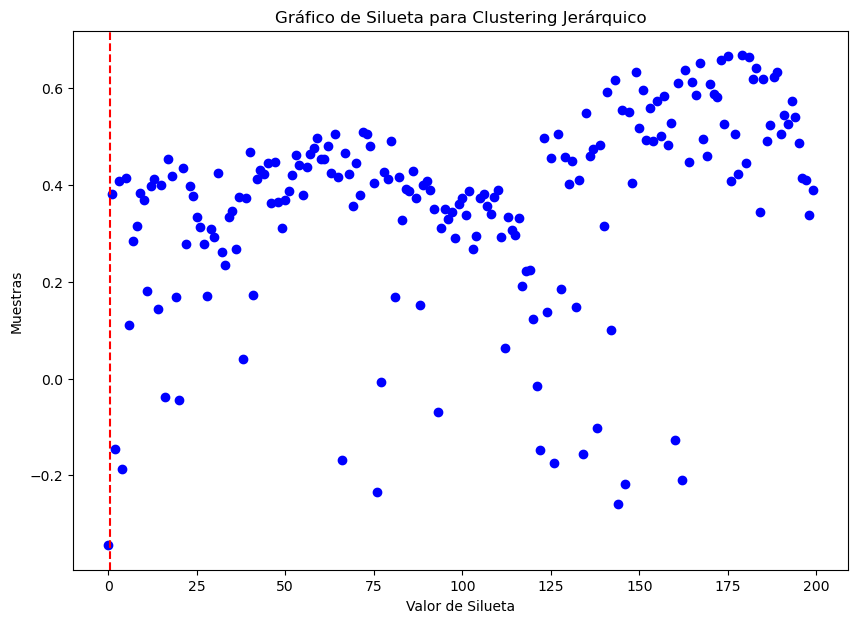

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

## Interpretar, analizar y documentar los resultados obtenidos

In [76]:
print ('En la edad de los 20 a 40 años hay mas ingresos anuales')
print ('En el gráfico de silueta las Silhouettes están mas agrupadas y cercanas a +4.')
print ('El Silhouette Score es de : 0.361')
print ('El Índice de Calinski-Harabasz: 88.10174149244529')
print ('El Índice de Davies-Bouldin: 1.1277290061047862')

En la edad de los 20 a 40 años hay mas ingresos anuales
En el gráfico de silueta las Silhouettes están mas agrupadas y cercanas a +4.
El Silhouette Score es de : 0.361
El Índice de Calinski-Harabasz: 88.10174149244529
El Índice de Davies-Bouldin: 1.1277290061047862
